## BUSINESS UNDERSTANDING

Overview
Kenya Power and Lighting Company (KPLC) often receives a high volume of tweets from customers reporting issues, asking questions, or providing feedback.Understanding customer sentiment towards KPLC is crucial to enable automating of responses, enhancing customer service efficiency, improving response times, and reduce the manual workload on customer service teams. The goal is to develop a chatbot capable of classifying various types of tweets and generating appropriate automated responses.


## Problem Statement
KPLC needs an automated sentiment analysis system to process and categorize customer feedback from social media, particularly X formerly (Twitter) where customers frequently express their sentiments regarding KPLC's services. By accurately classifying tweets related to KPLC’s services into sentiment categories the system will be able to identify issues by pinpointing common complaints and service issues and enhance customer feedback

### Objectives

* To gauge overall customer sentiment towards KPLC's services.·   

* To Identify specific issues mentioned in the tweets, such as token problems, power outages, billing issues, etc.

* To Create a chatbot that provides appropriate responses to customer inquiries


### Challenges
1. Data Collection and Preprocessing:
Gathering relevant tweets mentioning KPLC, especially when customers use various hashtags, misspellings or slang, can be difficult. Additionally, cleaning and preprocessing the data (e.g., removing noise like unrelated tweets, abbreviations) is crucial but time-consuming.

2. Sentiment Analysis Accuracy:
Accurately classifying the sentiment of tweets can be challenging due to the informal language, sarcasm, mixed sentiments and local dialects often used on X/Twitter.

3. Identifying Specific Issues:
Extracting and categorizing specific issues (e.g power outages, billing issues) mentioned in tweets can be complex due to the diverse ways in which customers describe their problems.

4. Real-time Data Processing:
Processing a continuous stream of tweets in real-time to provide timely insights and responses is demanding in terms of computational resources and model efficiency.

5. Handling Multilingual and Local Dialects:
Tweets may be in multiple languages or include local dialects, which can complicate sentiment analysis and issue detection. 
6. Evaluating Model Performance:
Ensuring the models perform well across different contexts, languages, and over time requires ongoing evaluation and tuning.




### Proposed Solution

* Use advanced Natural Language Processing (NLP) techniques and APIs to collect and preprocess tweets.

* Implement data cleaning scripts to filter out irrelevant data and normalize the text for consistent analysis. 

* Train sentiment analysis models using machine learning techniques such as supervised learning with labeled datasets

* Utilize existing chatbot frameworks like Rasa, integrated with the sentiment analysis and issue categorization models. This chatbot should be able to provide relevant responses based on the sentiment and identified issues and direct users to appropriate resources or support channels.

* Incorporate multilingual NLP models and fine-tune them with local dialect data. Using translation APIs where necessary to standardize inputs before analysis.



### Metrics of success:

* Sentiment Accuracy: Percentage of correctly classified sentiments (positive, negative, neutral).

* Issue Detection Rate: Number of key issues identified and addressed based on sentiment analysis.

* Train  a machine learning model with an accuracy of 85% and above


### Conclusion
The analysis of the tweets reveals that for Kenya Power and Lightning Company(KPLC),sentiment analysis of the tweets can o along way in assisting the company to understand and deal with customer feedback.In this way,KPLC will be able to focus on identifying the main problems developing and implementing corresponding strategies for the company’s service improvement and ultimately increasing the customer satisfaction level of their customers .The company will be able to maintain their brand image and identify the impending issues before they happen.

Despite the difficulties like dealing with  vast data and identification while analyzing the social media concerns ,performing sentiment analysis by analyzing tweets is effective.Since KLC has established key performance indicators of some of its goals such as raise in customer satisfaction scores and positive trend on brand sentiment,the company can use this tool to sustain its leadership in the energy sector while at the same time strengthening its relations with customers.


### Data Understanding

For this analysis data was collected from X (formely twitter) mainly focusing on tweets in English made to @KenyaPower_Care for the past 2 years.

The following keywords were a guidance on what to scrape from X:
* Tokens, Blackout, Restored, Delayed, Power, Transformer, Bills and Service

In [70]:
# Importing all the necessary Modules
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import glob
import re
import emoji

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

Merging all CSV files into one CSV file.

In [71]:
# path of CSV files
path = r'files'  
all_files = glob.glob(os.path.join(path, "*.csv"))

# Read and combine all CSV files
df_list = [pd.read_csv(file) for file in all_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file called kplc_df.csv
combined_df.to_csv('kplc_df.csv', index=False)


### Data Cleaning

Now that we have merged all our csvs into one csv file called kplc_df, let us not look at the basic info of our data 

In [72]:
class DataInfo:
    def __init__(self, file_path):
        # Initialize by reading the CSV file into a DataFrame
        self.df = pd.read_csv(file_path)
    
    def get_shape(self):
        # Return the shape of the DataFrame
        shape = self.df.shape
        print(f"Shape of the DataFrame: {shape}")
        return shape
    
    def get_dtypes(self):
        # Return the data types of each column
        dtypes = self.df.dtypes
        print("Data types of each column:")
        print(dtypes)
        return dtypes
    
    def get_missing_values(self):
        # Return the number of missing values per column
        missing_values = self.df.isnull().sum()
        print("Missing values per feature:")
        print(missing_values)
        return missing_values
    
    def get_basic_info(self):
        # Print basic info including shape, data types, and missing values
        print("Basic Information:")
        self.get_shape()
        self.get_dtypes()
        self.get_missing_values()
    
    def remove_irrelevant_columns(self, columns_to_remove):
        # Remove only the columns that exist in the DataFrame
        existing_columns = [col for col in columns_to_remove if col in self.df.columns]
        self.df.drop(columns=existing_columns, inplace=True)
        print(f"Removed columns: {existing_columns}")
        print("Updated DataFrame:")
        print(self.df.head())
        return self.df
    
    def remove_duplicates(self):
        # Remove duplicate entries based on the 'post' column
        initial_shape = self.df.shape
        self.df.drop_duplicates(subset='Post', inplace=True)
        final_shape = self.df.shape
        print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows.")
        print(f"New shape of the DataFrame: {final_shape}")
        return self.df

# Instantiating our class
data_info = DataInfo("kplc_df.csv")

# Get basic information about the dataset
data_info.get_basic_info()

# Remove irrelevant columns
irrelevant_columns = ['Author', 'Likes', 'Reposts', 'Comments', 'Post Link', 'Profile Links', 'Views', 'Post Link', 'Profile Link', 'Post Body', 'Retweets', 'Tweet URL', 'Timestamp', 'Name', 'Media URL', 'Profile Lİnk']
cleaned_df = data_info.remove_irrelevant_columns(irrelevant_columns)

# Remove duplicates in the 'post' column
cleaned_df_no_duplicates = data_info.remove_duplicates()


Basic Information:
Shape of the DataFrame: (14511, 16)
Data types of each column:
Author           object
Handle           object
Media URL        object
Reposts         float64
Likes           float64
Comments        float64
Views            object
Post Link        object
Profile Link     object
Post             object
Date             object
Name             object
Retweets        float64
Tweet URL        object
Post Body        object
Profile Lİnk     object
dtype: object
Missing values per feature:
Author            357
Handle              0
Media URL       14487
Reposts         13605
Likes           12255
Comments         5745
Views           13309
Post Link        5105
Profile Link     5086
Post              326
Date                0
Name            14185
Retweets        14500
Tweet URL       14185
Post Body       14185
Profile Lİnk    14204
dtype: int64
Removed columns: ['Author', 'Likes', 'Reposts', 'Comments', 'Post Link', 'Views', 'Post Link', 'Profile Link', 'Post Body', 'Re

Our kplc_df dataset has 15 features and some of the features have missing values like likes, Reposts and comments. We have opted for deletion of these columns since they are irrelevant

We also had different data Types such us floats and Objects. We then checked for duplicates and removed all the duplicated text on post columns

Let us again see how our data looks like and whether there is any missing values

In [73]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11736 entries, 0 to 14509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Handle  11736 non-null  object
 1   Post    11735 non-null  object
 2   Date    11736 non-null  object
dtypes: object(3)
memory usage: 366.8+ KB


Amazing there are no null values

We can now proceed to the next stage where we are going to remove any emojis present in our dataset, remove punctuation, lowercase all the posts, remove any noise such as mentions and hashtags, filter-out non-english words, lemmitize and then tokenize our data

In [74]:
def remove_pattern(text, pattern_regex):
    if isinstance(text, str):
        return re.sub(pattern_regex, '', text)
    else:
        return text

cleaned_df['Post'] = cleaned_df['Post'].apply(lambda x: remove_pattern(x, r"@[\w]*"))

# Display the first 10 rows to check the results
print(cleaned_df.head(10))


             Handle                                               Post    Date
0  @Momanyi10908868      We are already in a blackout as , 37170880035  29-Jul
1   @FrancisKimunya   we are in blackout the whole of Njoro and Ege...  29-Jul
2        @LinaCheps          We are in a blackout again please resolve  29-Jul
3     @CShihembetsa    kindly check out power line, we've had a bla...  28-Jul
4     @CShihembetsa   kindly check out power line, we've had a blac...  28-Jul
5        @vicklamka    blackout for the last 2 hrs . kindly work on...  28-Jul
6     @CShihembetsa   kindly check out power line, we've had a blac...  28-Jul
7   @gachagua_grace  I am having a blackout  since yesterday at 2pm...  28-Jul
8   @gachagua_grace  I am in blackout  since yesterday my meter num...  28-Jul
9   @gachagua_grace    am in blackout since yesterday 2pm  my meter...  28-Jul


In [75]:
class TextCleaner:
    def __init__(self, df, text_column):
        self.df = df
        self.text_column = text_column
        self.stop_words = set(stopwords.words('english'))
    
    def remove_pattern(self, text, pattern_regex):
        #Remove a specific pattern from the text
        return re.sub(pattern_regex, '', text)

    def handle_emojis(self, text):
        #Replace emojis with corresponding text descriptions.
        return emoji.demojize(text, delimiters=(" ", " "))
    
    def to_lowercase(self, text):
        #Convert text to lowercase.
        return text.lower()
    
    def remove_punctuation_numbers(self, text):
        #Remove punctuation and numbers from the text.
        return re.sub(r'[^a-zA-Z\s]', '', text)
    
    def remove_mentions_hashtags(self, text):
        #Remove mentions (@) and hashtags (#) along with any attached words.
        text = self.remove_pattern(text, r'@\w+')
        text = self.remove_pattern(text, r'#\w+')
        return text
    
    def remove_stopwords(self, text):
        #Remove stopwords from the text
        return ' '.join(word for word in text.split() if word not in self.stop_words)
    
    def clean_single_text(self, text):
        #Clean a single piece of text by applying all steps.
        if pd.isna(text):
            return ''
        text = self.handle_emojis(text)
        text = self.to_lowercase(text)
        text = self.remove_punctuation_numbers(text)
        text = self.remove_mentions_hashtags(text)
        text = self.remove_stopwords(text)
        return text
    
    def clean_text(self):
        #Apply all cleaning steps to the specified text column in the DataFrame.
        self.df[self.text_column] = self.df[self.text_column].apply(lambda text: self.clean_single_text(text))
        return self.df


In [76]:
# Instantiate our TextCleaner Class
text_cleaner = TextCleaner(cleaned_df, text_column='Post')
cleaned_df = text_cleaner.clean_text()
print(cleaned_df.head())

             Handle                                               Post    Date
0  @Momanyi10908868                                   already blackout  29-Jul
1   @FrancisKimunya  blackout whole njoro egerton university area p...  29-Jul
2        @LinaCheps                            blackout please resolve  29-Jul
3     @CShihembetsa  kindly check power line weve blackout yesterda...  28-Jul
4     @CShihembetsa  kindly check power line weve blackout yesterda...  28-Jul


## Sentiment Analysis and Text Preprocessing.

This analysis will help us understand the general sentiment towards KPLC's services and identify the key issues that are being mentioned. By looking at the sentiment associated with specific keywords, we can gain insights into which aspects of the service are causing the most dissatisfaction (or satisfaction) among users.

In [77]:
cleaned_df

,Handle,Post,Date
0,@Momanyi10908868,already blackout,29-Jul
1,@FrancisKimunya,blackout whole njoro egerton university area p...,29-Jul
2,@LinaCheps,blackout please resolve,29-Jul
3,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul
4,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul
...,...,...,...
14501,@ItsKamauMuranga,changed bill payment methods accounts want pay...,January 2
14505,@WangenyeSimon,hello paid prepaid bill wrong meter number kin...,January 2
14506,@rosenellnyax,thank finally acting however issue transformer...,Jan 1
14507,@NickOduor,cant power black outs every two days please so...,Jan 1


Sentiment Analysis Method choosem was **VADER** (Valence Aware Dictionary for sEntiment Reasoning). This is beacuse it is particularly suited for social media text due to its ability to understand the context of language used online.

In [78]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Apply sentiment analysis to each tweet
cleaned_df['Vader_sentiment_score'] = cleaned_df['Post'].apply(lambda post: sid.polarity_scores(post)['compound'])

# Classify the sentiment
cleaned_df['Vader_sentiment_label'] = cleaned_df['Vader_sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

This calculates the sentiment score for each tweet and classifies it as positive, negative, or neutral.

In [79]:
cleaned_df

,Handle,Post,Date,Vader_sentiment_score,Vader_sentiment_label
0,@Momanyi10908868,already blackout,29-Jul,0.0000,neutral
1,@FrancisKimunya,blackout whole njoro egerton university area p...,29-Jul,0.6369,positive
2,@LinaCheps,blackout please resolve,29-Jul,0.5994,positive
3,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.4939,positive
4,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.8078,positive
...,...,...,...,...,...
14501,@ItsKamauMuranga,changed bill payment methods accounts want pay...,January 2,-0.0258,negative
14505,@WangenyeSimon,hello paid prepaid bill wrong meter number kin...,January 2,0.1027,positive
14506,@rosenellnyax,thank finally acting however issue transformer...,Jan 1,0.7906,positive
14507,@NickOduor,cant power black outs every two days please so...,Jan 1,0.5719,positive


Sentiment Analysis Using **TextBlob**. It is another tool that can be used for sentiment analysis, and it provides polarity (positive/negative) and subjectivity (objective/subjective) scores.

In [80]:
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    
    # Determine sentiment label
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis
cleaned_df['TextBlob_Sentiment'] = cleaned_df['Post'].apply(analyze_sentiment_textblob)


Compairing the two methods of sentiment analysis, vander and one using textblob.

In [81]:
cleaned_df.head(20)

,Handle,Post,Date,Vader_sentiment_score,Vader_sentiment_label,TextBlob_Sentiment
0,@Momanyi10908868,already blackout,29-Jul,0.0000,neutral,Neutral
1,@FrancisKimunya,blackout whole njoro egerton university area p...,29-Jul,0.6369,positive,Positive
2,@LinaCheps,blackout please resolve,29-Jul,0.5994,positive,Neutral
3,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.4939,positive,Positive
4,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.8078,positive,Positive
5,@vicklamka,blackout last hrs kindly work,28-Jul,0.4939,positive,Positive
6,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.4939,positive,Positive
7,@gachagua_grace,blackout since yesterday pm meter number,28-Jul,0.0772,positive,Neutral
8,@gachagua_grace,blackout since yesterday meter number,28-Jul,0.0772,positive,Neutral
9,@gachagua_grace,blackout since yesterday pm meter number,28-Jul,0.0772,positive,Neutral


### Keyword Categorization
To categorize tweets based on specific keywords like "Transformer", "Blackout", etc. We created columns for each keyword and marked the rows that mention them:

In [82]:
keywords = ['transformer', 'bill', 'blackout', 'interruption', 'meter', 'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima']

# Create columns for each keyword
for keyword in keywords:
    cleaned_df[keyword] = cleaned_df['Post'].str.contains(keyword, case=False, na=False)


In [83]:
cleaned_df

,Handle,Post,Date,Vader_sentiment_score,Vader_sentiment_label,TextBlob_Sentiment,transformer,bill,blackout,interruption,meter,connection,tokens,service,restored,delayed,power,stima
0,@Momanyi10908868,already blackout,29-Jul,0.0000,neutral,Neutral,False,False,True,False,False,False,False,False,False,False,False,False
1,@FrancisKimunya,blackout whole njoro egerton university area p...,29-Jul,0.6369,positive,Positive,False,False,True,False,False,False,False,False,False,False,True,False
2,@LinaCheps,blackout please resolve,29-Jul,0.5994,positive,Neutral,False,False,True,False,False,False,False,False,False,False,False,False
3,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.4939,positive,Positive,False,False,True,False,False,False,False,False,False,False,True,False
4,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.8078,positive,Positive,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14501,@ItsKamauMuranga,changed bill payment methods accounts want pay...,January 2,-0.0258,negative,Neutral,False,True,False,False,False,False,False,False,False,False,False,False
14505,@WangenyeSimon,hello paid prepaid bill wrong meter number kin...,January 2,0.1027,positive,Positive,False,True,False,False,True,False,False,False,False,False,False,False
14506,@rosenellnyax,thank finally acting however issue transformer...,Jan 1,0.7906,positive,Negative,True,False,False,False,False,False,False,False,False,False,False,False
14507,@NickOduor,cant power black outs every two days please so...,Jan 1,0.5719,positive,Negative,True,False,False,False,False,False,False,False,True,False,True,False


Ploting for both methods:

In [84]:
# Overall  vader sentiment distribution
sentiment_distribution = cleaned_df['Vader_sentiment_label'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 Vader_sentiment_label
positive    5365
negative    3597
neutral     2774
Name: count, dtype: int64


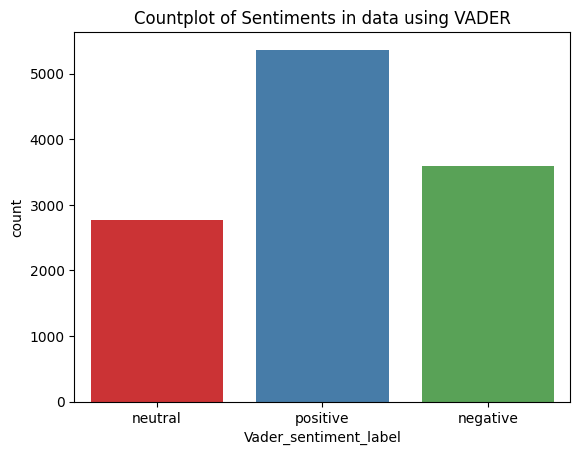

<Figure size 1000x1000 with 0 Axes>

In [85]:
# Displaying the sentiments on a countplot

sns.countplot(x = 'Vader_sentiment_label',data = cleaned_df,palette='Set1' )
plt.title('Countplot of Sentiments in data using VADER')
plt.figure(figsize=(10,10),dpi=100)
plt.show()


In [86]:
# Overall textblob sentiment distribution
sentiment_distribution = cleaned_df['TextBlob_Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 TextBlob_Sentiment
Neutral     5019
Positive    4488
Negative    2229
Name: count, dtype: int64


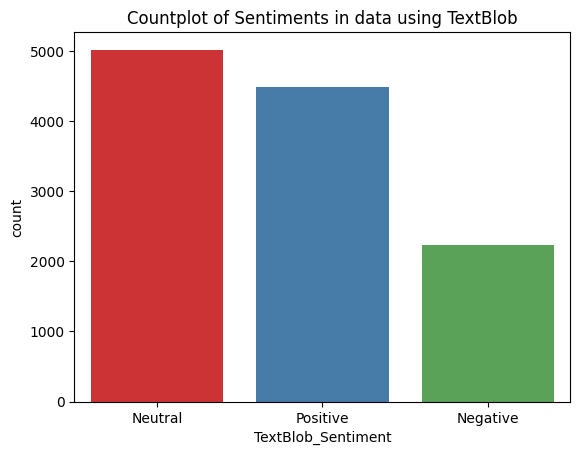

<Figure size 1000x1000 with 0 Axes>

In [87]:
sns.countplot(x = 'TextBlob_Sentiment',data = cleaned_df,palette='Set1' )
plt.title('Countplot of Sentiments in data using TextBlob')
plt.figure(figsize=(10,10),dpi=100)
plt.show()


We decided to go with the VADER Sentiment Analysis method since it is more suitable to social media data like tweets.
As shown, Kenya power customer care account in X platform (KenyaPower_Care), receives more positive posts than neutral and negative. Positive posts are 5365, negative posts are 3597, and neutral posts are 2774.

Plotting to view the frequency of keywords choosen that are in the posts, that is: 'transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power' and 'stima'.


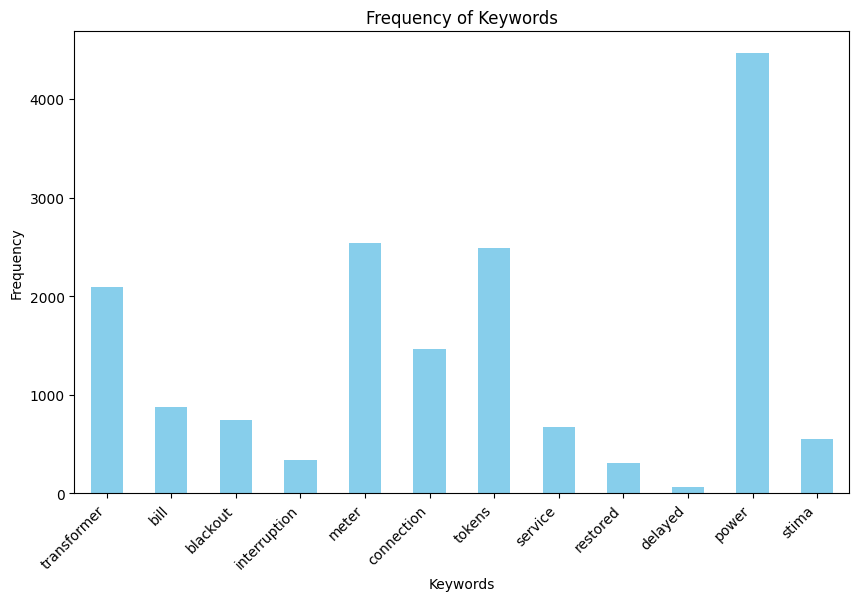

In [88]:
# Assuming your DataFrame is named df
columns_to_plot = ['transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima']


# Calculate the frequency of each keyword
frequency = cleaned_df[columns_to_plot].sum()

# Plotting the frequency
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Stima is not frequently mentioned in posts since we scrapped mostly posts in the English language. The Two most mentioned keywords are 'power ' at over 4000 and 'meter'. This is followed by keywords 'tokens,  then 'transformer'. The least mentioned keyword is 'delayed'.
This will be considered during modelling.

In [89]:
frequency

transformer     2097
bill             879
blackout         749
interruption     341
meter           2543
connection      1465
tokens          2489
service          677
restored         314
delayed           66
power           4463
stima            555
dtype: int64

### Preparing Data

This will involve the folllowing:

Tokenization:Breaking down the text into individual words,called Tokens.

Lemmatization:Similar to stemming but sophisticated,converting words to their canonical based on their context such as "better" to "good"

In [90]:
#dropping columns 
processed_df = cleaned_df.drop(['transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima', 'Handle','Date',	'Vader_sentiment_score','TextBlob_Sentiment'],axis=1)

In [91]:
processed_df.head()

,Post,Vader_sentiment_label
0,already blackout,neutral
1,blackout whole njoro egerton university area p...,positive
2,blackout please resolve,positive
3,kindly check power line weve blackout yesterda...,positive
4,kindly check power line weve blackout yesterda...,positive


In [92]:
# Tokenize the text in the 'Post' column
processed_df['tokens'] = processed_df['Post'].apply(word_tokenize)

processed_df

,Post,Vader_sentiment_label,tokens
0,already blackout,neutral,"[already, blackout]"
1,blackout whole njoro egerton university area p...,positive,"[blackout, whole, njoro, egerton, university, ..."
2,blackout please resolve,positive,"[blackout, please, resolve]"
3,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y..."
4,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y..."
...,...,...,...
14501,changed bill payment methods accounts want pay...,negative,"[changed, bill, payment, methods, accounts, wa..."
14505,hello paid prepaid bill wrong meter number kin...,positive,"[hello, paid, prepaid, bill, wrong, meter, num..."
14506,thank finally acting however issue transformer...,positive,"[thank, finally, acting, however, issue, trans..."
14507,cant power black outs every two days please so...,positive,"[cant, power, black, outs, every, two, days, p..."


In [93]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Lemmatize the tokens
processed_df['lemmatized'] = processed_df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens])

### Story Generation and Visualization 

This function will visualize the most common words according to the polarity related to KPLC

This will get the wordclouds for negative,positive,and  neutral tweets,helping in visualliation f the different sentiments expressed in the tweets about KPLC services.

In [94]:
from wordcloud import WordCloud

def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, 
                          relative_scaling=0.5, colormap='Dark2').generate(all_words)
    
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Most common positive tweets

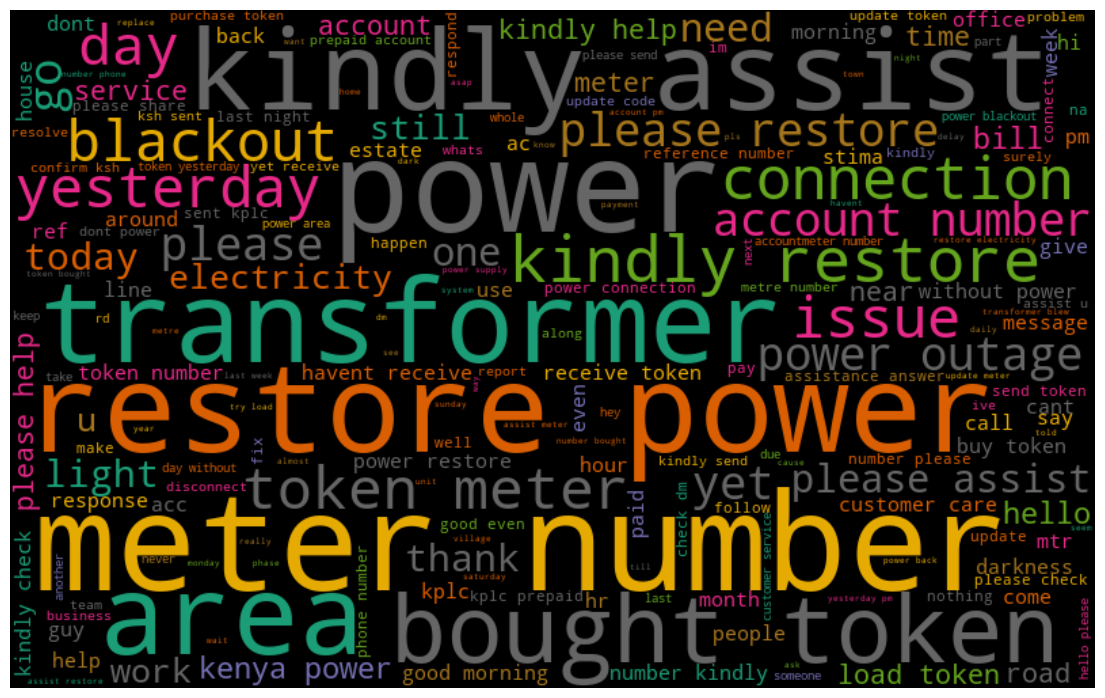

In [95]:
# Generate word cloud for positive tweets
all_words = ' '.join([' '.join(text) for text in processed_df['lemmatized'][processed_df['Vader_sentiment_label'] == 'positive']])
generate_wordcloud(all_words)

Generating and sisplaying the most common words labelled as negative

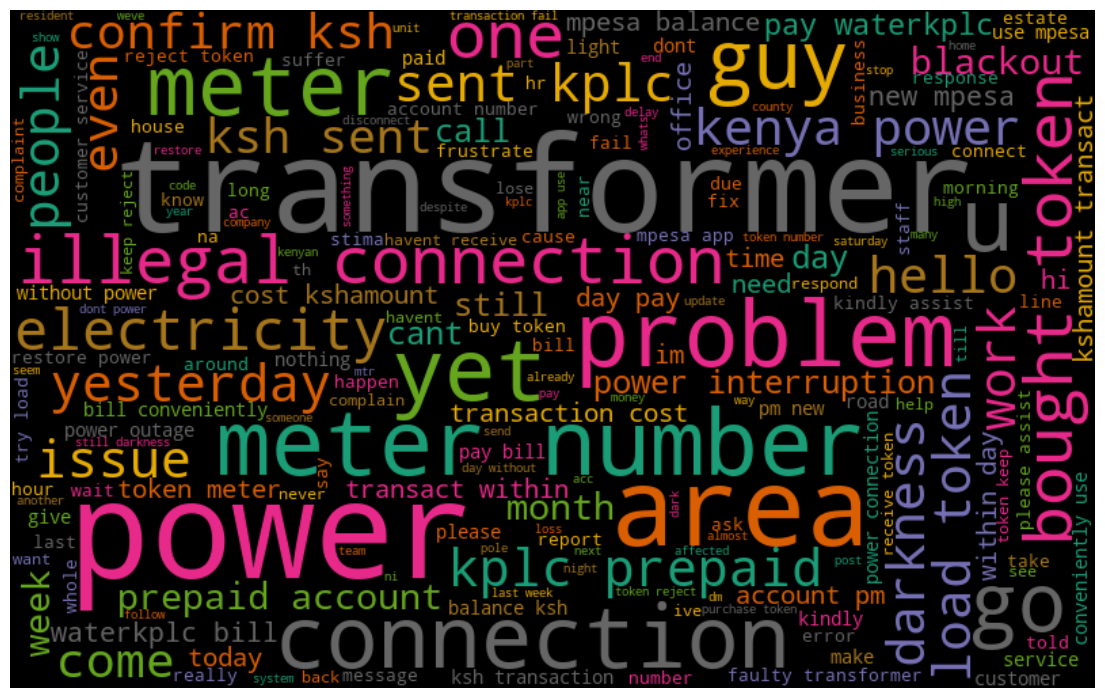

In [96]:
# Generate word cloud for negative tweets
all_words_negative = ' '.join([' '.join(text) for text in processed_df['lemmatized'][processed_df['Vader_sentiment_label'] == 'negative']])
generate_wordcloud(all_words_negative)

Most common words labelled as neutral

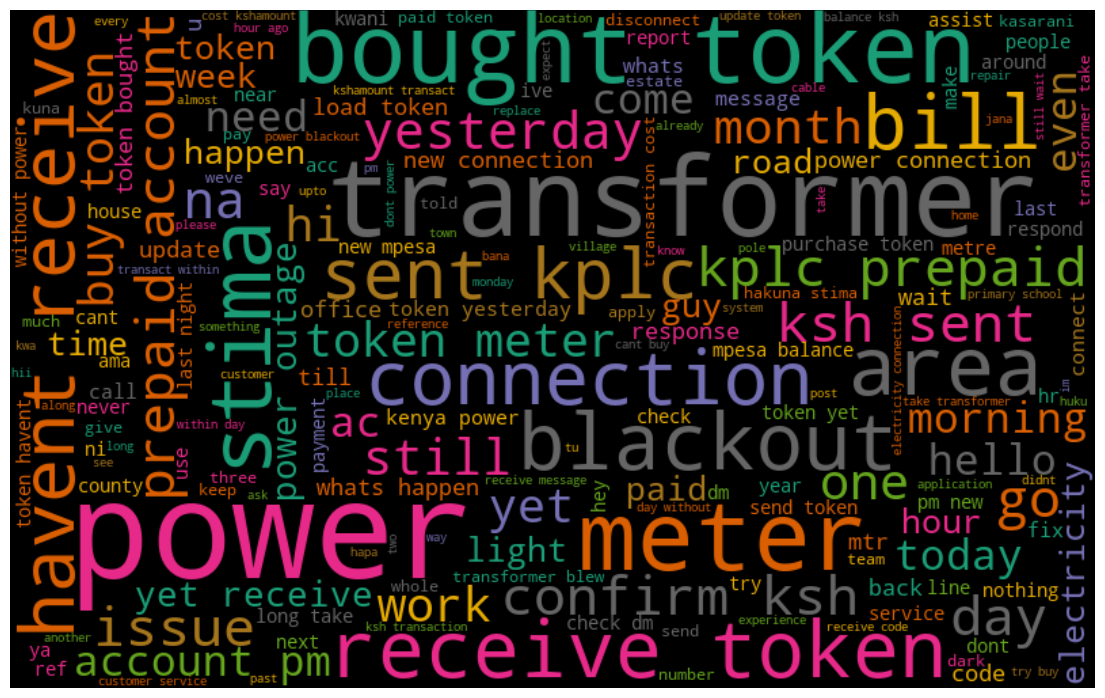

In [97]:
# Generate word cloud for neutral tweets
all_words_neutral = ' '.join([' '.join(text) for text in  processed_df['lemmatized'][processed_df['Vader_sentiment_label'] == 'neutral']])
generate_wordcloud(all_words_neutral)

#### Vectorization

Vectorizing the data  is transforming the text data to numerical formt that can be used for further machine learning tasks.
Both the CountVectorizer and TfidVectorizer methods are used in this case .

#### CountVectorizer 

This converts the text data into a matrix of token counts.Useful in the cases of using raw frequency of words in the analysis

In [98]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Vectorize the lemmatized column
X_count = count_vectorizer.fit_transform(processed_df['lemmatized'].apply(lambda x: ' '.join(x)))

# Convert to DataFrame for easier interpretation
count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())

print(count_df.head())

   aa  aaii  abadare  abandon  abardare  abasalama  abc  abdulhakim  abeid  \
0   0     0        0        0         0          0    0           0      0   
1   0     0        0        0         0          0    0           0      0   
2   0     0        0        0         0          0    0           0      0   
3   0     0        0        0         0          0    0           0      0   
4   0     0        0        0         0          0    0           0      0   

   abhorrent  ...  zmerudi  zn  znaingia  znapanda  zone  zoom  zoomteams  \
0          0  ...        0   0         0         0     0     0          0   
1          0  ...        0   0         0         0     0     0          0   
2          0  ...        0   0         0         0     0     0          0   
3          0  ...        0   0         0         0     0     0          0   
4          0  ...        0   0         0         0     0     0          0   

   zooooote  zote  zungusha  
0         0     0         0  
1       

For a countVectorizer ,each word in the corpus(text data)becomes a column in the matrix and each row corresponds to a document(a tweet in this case).The numbers in the matrix represnr the frequency of the corresponding word in each tweet.

The matrix can be used as input for further analysis or machine learning models.The high number of columns(19,747)indicates that we have a vast vocabulary,which is expected given the diverse language of social media posts.

#### Tfid Vectorizer

This converts the data into a matrix of TF_IDF features.Its useful when you want to account for the importance of words across different documents,reducing the weight of commonly occurring words.

In [99]:
# Limit the number of features to, for example, 5000 most common words
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(processed_df['lemmatized'].apply(lambda x: ' '.join(x)))

# Convert the sparse matrix to a sparse DataFrame
sparse_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out(), index=processed_df.index)
# Display the first few rows of the sparse DataFrame
print(sparse_tfidf.head())

    aa  abadare  abandon  abasalama  abide  able  abothoguchi  abroad  \
0  0.0      0.0      0.0        0.0    0.0   0.0          0.0     0.0   
1  0.0      0.0      0.0        0.0    0.0   0.0          0.0     0.0   
2  0.0      0.0      0.0        0.0    0.0   0.0          0.0     0.0   
3  0.0      0.0      0.0        0.0    0.0   0.0          0.0     0.0   
4  0.0      0.0      0.0        0.0    0.0   0.0          0.0     0.0   

   absolutely  abstract  ...  zinaharibika  zinapotea  zingine  zipotee  \
0         0.0       0.0  ...           0.0        0.0      0.0      0.0   
1         0.0       0.0  ...           0.0        0.0      0.0      0.0   
2         0.0       0.0  ...           0.0        0.0      0.0      0.0   
3         0.0       0.0  ...           0.0        0.0      0.0      0.0   
4         0.0       0.0  ...           0.0        0.0      0.0      0.0   

   zishaharibika  zisinyeshewe  ziwani   zn  zone  zote  
0            0.0           0.0     0.0  0.0   0.0   

Each cell  contains the TF_IDF score for the corresponding word in the text data.

The TF_IDF output provides a detailed represantion of the importance of words within each tweet,relative to thr entire dataset.

High TF_IDF scores indicate that the word is particularly important to the content of a specific tweet ad not too common across all tweets making it a strong indicator of the tweets mainn topic .

Sparse matrix most values are 0.0 showing that each tweet contains only a fwe of the relevant words from the main vocabulary.

In [100]:
processed_df.head()

,Post,Vader_sentiment_label,tokens,lemmatized
0,already blackout,neutral,"[already, blackout]","[already, blackout]"
1,blackout whole njoro egerton university area p...,positive,"[blackout, whole, njoro, egerton, university, ...","[blackout, whole, njoro, egerton, university, ..."
2,blackout please resolve,positive,"[blackout, please, resolve]","[blackout, please, resolve]"
3,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y...","[kindly, check, power, line, weve, blackout, y..."
4,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y...","[kindly, check, power, line, weve, blackout, y..."


### 4). MODELLING AND EVALUATION

In this section we perform modelling based on the outputs of the text preprocessing to determine which model is suitable for proper issue categorization that will be used in creation of the chatbot

### 4.1 Issue Categorization 
Using keywords we created a dictionary that takes into acccount words used in the tweets and assign them to a given key.

In [101]:
#Manually Labelling the tweets
issues = {
    "token_issues": ["token", "meter", "number", "bill", "payment", "receive", "purchase", "due", "invoice", "cost", "rate", "charge"],
    "power_outage": ["blackout", "power", "electricity", "outage","supply" ,"failure", "interruption", "connection", "grid", "supply"],
    "transformer_issue": ["transformer","explode","blow", "station", "equipment", "line"],
    "account_issue": ["bills", "overcharge", "cost", "paid","service", "customer", "care", "help", "support", "complaint", "invoice","acc"]               
}

In [102]:
def classify_issue(tweet):
    tweet = tweet.lower() 

    for category, keywords in issues.items():
        if any(keyword in tweet for keyword in keywords):
            return category

    return "other"

In [103]:
# Apply the classify_issue function to each tweet in the 'Post' column
processed_df['Classified_Issue'] = processed_df['Post'].apply(classify_issue)

In [104]:
processed_df.head(20)

,Post,Vader_sentiment_label,tokens,lemmatized,Classified_Issue
0,already blackout,neutral,"[already, blackout]","[already, blackout]",power_outage
1,blackout whole njoro egerton university area p...,positive,"[blackout, whole, njoro, egerton, university, ...","[blackout, whole, njoro, egerton, university, ...",power_outage
2,blackout please resolve,positive,"[blackout, please, resolve]","[blackout, please, resolve]",power_outage
3,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y...","[kindly, check, power, line, weve, blackout, y...",power_outage
4,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y...","[kindly, check, power, line, weve, blackout, y...",power_outage
5,blackout last hrs kindly work,positive,"[blackout, last, hrs, kindly, work]","[blackout, last, hr, kindly, work]",power_outage
6,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y...","[kindly, check, power, line, weve, blackout, y...",power_outage
7,blackout since yesterday pm meter number,positive,"[blackout, since, yesterday, pm, meter, number]","[blackout, since, yesterday, pm, meter, number]",token_issues
8,blackout since yesterday meter number,positive,"[blackout, since, yesterday, meter, number]","[blackout, since, yesterday, meter, number]",token_issues
9,blackout since yesterday pm meter number,positive,"[blackout, since, yesterday, pm, meter, number]","[blackout, since, yesterday, pm, meter, number]",token_issues


The classified issue column has been added to the dataframe and is able to categorize the original tweet based on the category it fits best.

In [105]:
#importing the libraries necessary to perfom modelling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import LinearSVC

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout
from keras.preprocessing.sequence import pad_sequences 
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

import pickle

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sparse_tfidf, processed_df['Classified_Issue'], test_size=0.3, random_state=42)

#### a) Naive_Bayes Classification 

Because of its suitability in text data and its simplicity we run it as the base classifier

In [107]:
class Modeling:
    def __init__(self, data):
        self.data = data

    def models(self,classifier,X_train,y_train,X_test,y_test):
        # Fit the model
        classifier.fit(X_train,y_train)

        #Make predictions
        y_hat_train = classifier.predict(X_train)
        y_hat_test = classifier.predict(X_test)  

        #Print the accuracy scores for the model test
        train_acc = accuracy_score(y_train,y_hat_train)
        test_acc = accuracy_score(y_test,y_hat_test)
        print("\n"f"The model has an accuracy of {test_acc*100:.2f}% on the test test")
        print(f"The Model has an accuracy of {train_acc*100:.2f}% on the train test")

        print("Classification Report:")
        print(classification_report(y_test, y_hat_test))

    def data_prep(self): 
        # Tokenization and padding
        tokenizer = Tokenizer(num_words=5000)
        tokenizer.fit_on_texts(processed_df['lemmatized'].apply(lambda x: ' '.join(x)))
        X_seq = tokenizer.texts_to_sequences(processed_df['lemmatized'].apply(lambda x: ' '.join(x)))
        X_padded = pad_sequences(X_seq, maxlen=50)

        # Save the tokenizer to a pickle file
        with open('tokenizer.pkl', 'wb') as f:
            pickle.dump(tokenizer, f)
            
        # Encode the labels
        le = LabelEncoder()
        y_encoded = le.fit_transform(processed_df['Classified_Issue']) 
        y = to_categorical(y_encoded)  

        # Split into training, validation, and test sets
        X_temp, X_test, y_temp, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  

        return X_train, X_test, y_train, y_test, X_val, y_val

    def neural_model(self, model, X_train, X_test, y_train, y_test, X_val, y_val):
        # Compile the model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Training the model
        model.fit(X_train, y_train,epochs=5, batch_size=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

        # Evaluate the model
        loss, accuracy = model.evaluate(X_test, y_test)

        # Make predictions
        y_pred_proba = model.predict(X_test)

        # Convert probabilities to class labels
        y_pred_labels = np.argmax(y_pred_proba, axis=1)

        # Assuming y_test is in categorical format, convert it to class labels
        y_test_labels = np.argmax(y_test, axis=1)

        # Evaluate performance
        print("Neural Network Testing Accuracy Score:", accuracy_score(y_test_labels, y_pred_labels))
        print(f"Neural Network Training Accuracy Score : {accuracy}") 
        print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))      

In [108]:
modeler = Modeling(processed_df)

In [109]:
# Initialize and train the Naive Bayes model
nb_classifier = MultinomialNB()

modeler.models(nb_classifier,X_train,y_train,X_test,y_test)


The model has an accuracy of 79.55% on the test test
The Model has an accuracy of 83.82% on the train test
Classification Report:
                   precision    recall  f1-score   support

    account_issue       0.00      0.00      0.00        45
            other       0.92      0.09      0.16       127
     power_outage       0.68      0.88      0.77      1248
     token_issues       0.89      0.89      0.89      1894
transformer_issue       0.00      0.00      0.00       207

         accuracy                           0.80      3521
        macro avg       0.50      0.37      0.36      3521
     weighted avg       0.75      0.80      0.76      3521



. The Naive Bayes model performs well in predicting the "power_outage" and "token_problem" categories, with high precision, recall, and F1-scores.

. The model struggles with minority classes like "billing_issues," "transformer_issue," and "other," resulting in low performance metrics for these categories

. The model achieves an overall accuracy of 79.55%, primarily driven by its success in predicting more frequent classes.

The Naive Bayes model may be underfitting given that both accuracies are relatively low. 

The model may not be complex enough to capture the underlying patterns in the data.

To improve performance on underrepresented we considered using more complex  models 

#### b) Support Vector Machine Classification

In [110]:
# Initialize and train the LinearSVC model
linear_svc_classifier = LinearSVC(random_state=42)
modeler.models(linear_svc_classifier,X_train,y_train,X_test,y_test)



The model has an accuracy of 95.09% on the test test
The Model has an accuracy of 99.82% on the train test
Classification Report:
                   precision    recall  f1-score   support

    account_issue       0.87      0.60      0.71        45
            other       0.88      0.88      0.88       127
     power_outage       0.91      0.98      0.94      1248
     token_issues       0.99      0.96      0.98      1894
transformer_issue       0.87      0.79      0.83       207

         accuracy                           0.95      3521
        macro avg       0.90      0.84      0.87      3521
     weighted avg       0.95      0.95      0.95      3521




The Linear SVC model performs exceptionally well, achieving a 95.09% accuracy on test data. 

The model performs very well on the training data but generalizes less effectively to the test data indicating overfiting.

The model might be too complex, capturing noise rather than just the underlying patterns.

The model shows a good balance for most classes but could benefit from improving recall for 'billing issues' and 'token problem' without sacrificing precision.

#### c) Neural Network

The 3rd model will take into acount deep learning so as to learn the complex relationships and patterns in data.

Since text data is sequential RNNs, such as LSTM networks, are particularly well-suited for handling this kind of data.

In [111]:
#Spliting the Data for neural network model
X_train, X_test, y_train, y_test, X_val, y_val = modeler.data_prep()

In [112]:
y_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [113]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=50))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(50, dropout=0.4, recurrent_dropout=0.4, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [114]:
modeler.neural_model(model, X_train, X_test, y_train, y_test, X_val, y_val)

Epoch 1/5
71/71 [==============================] - 75s 599ms/step - loss: 1.8530 - accuracy: 0.5089 - val_loss: 1.2329 - val_accuracy: 0.5445
Epoch 2/5
71/71 [==============================] - 45s 632ms/step - loss: 0.8839 - accuracy: 0.7553 - val_loss: 0.6347 - val_accuracy: 0.8257
Epoch 3/5
71/71 [==============================] - 109s 2s/step - loss: 0.5453 - accuracy: 0.8519 - val_loss: 0.4719 - val_accuracy: 0.8615
Epoch 4/5
71/71 [==============================] - 45s 638ms/step - loss: 0.4163 - accuracy: 0.8737 - val_loss: 0.3915 - val_accuracy: 0.8760
Epoch 5/5
74/74 [==============================] - 7s 70ms/step
Neural Network Testing Accuracy Score: 0.9024701873935264
Neural Network Training Accuracy Score : 0.9024701714515686
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.67      0.03      0.05        77
           2       0.87      0.97      0.92       854
           

The val loss is decreasing whereas the val accuracy is increasing per epoch which indicates the model is improving its performance 

* Loss of 0.3573 suggests that the model has relatively low error on the training data.

* Accuracy of 90.24% represents the proportion of correctly classified instances out of the total instances in the training data.Furthermore the testing and training accuracy are not far off

The best model to use in classifying tweets is the Recurrent Neural Network as it has the highest accuracy score of the three and captures the patterns in the tweets users send

In [115]:
# Save the model
model.save('categorization_model.h5')

### Recommendations

* Integrate the model with a chatbot framework so as to provide automated response to Kenya Power Clients

* Create user guides for interacting with the chatbot.

* Plan for periodic model retraining with new data to ensure it captures any new issue arising and stay up to date

* Implement mechanisms for collecting user feedback and use the feedback for iterative improvements to the model and chatbot.